<a href="https://colab.research.google.com/github/dvoils/neural-network-experiments/blob/main/sho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Simple Harmonic Oscillator (SHO)

A **Simple Harmonic Oscillator (SHO)** is one of the most fundamental models in classical mechanics. It describes systems in which the restoring force is directly proportional to the displacement from equilibrium and acts in the opposite direction. Common physical examples include a mass attached to a spring and small-angle pendulum oscillations.

## Newtonian Formulation

According to Newton’s second law, the net force acting on a mass is equal to the product of its mass and acceleration. For a spring obeying Hooke’s law, the restoring force is given by $F = -kx$, where $k$ is the spring constant and $x$ is the displacement from equilibrium. Applying Newton’s law:

$$
m \ddot{x} = -kx
$$

This leads to the second-order linear differential equation governing the motion of the SHO:

$$
m \ddot{x} + kx = 0
$$

This is a homogeneous linear differential equation with constant coefficients.

## Solution via Characteristic Equation

To solve this ODE, we assume a trial solution of the form:

$$
x(t) = e^{\lambda t}
$$

Substituting into the differential equation gives the characteristic equation:

$$
m \lambda^2 + k = 0
$$

Solving for $\lambda$, we obtain:

$$
\lambda = \pm i \sqrt{\frac{k}{m}} = \pm i \omega_0
$$

where we define the **natural angular frequency**:

$$
\omega_0 = \sqrt{\frac{k}{m}}
$$

Thus, the general solution to the SHO is:

$$
x(t) = A \cos(\omega_0 t) + B \sin(\omega_0 t)
$$

where $A$ and $B$ are constants determined by the initial conditions. Alternatively, it may be written in amplitude-phase form:

$$
x(t) = C \cos(\omega_0 t + \phi)
$$

where $C$ is the amplitude and $\phi$ is the phase.

## Phase Space Representation

The **phase space** of the SHO consists of the variables $x$ (position) and $\dot{x}$ (velocity). A plot of $\dot{x}(t)$ vs. $x(t)$ yields an ellipse, since the SHO undergoes uniform motion in phase space:

$$
x(t) = C \cos(\omega_0 t), \quad \dot{x}(t) = -C \omega_0 \sin(\omega_0 t)
$$

Eliminating time:

$$
\left( \frac{x}{C} \right)^2 + \left( \frac{\dot{x}}{C \omega_0} \right)^2 = 1
$$

This closed curve reflects the energy-conserving nature of the oscillator.

## Energy Conservation in SHO

The total mechanical energy of the SHO is the sum of kinetic and potential energy. The **kinetic energy** is:

$$
T = \frac{1}{2} m \dot{x}^2
$$

The **potential energy** stored in the spring is:

$$
U = \frac{1}{2} k x^2
$$

Thus, the total energy $E$ is:

$$
E = T + U = \frac{1}{2} m \dot{x}^2 + \frac{1}{2} k x^2
$$

Substituting the solutions $x(t)$ and $\dot{x}(t)$, we find that $E$ is constant in time. This reflects the conservative nature of the SHO system, with energy oscillating between kinetic and potential forms.

## Natural Frequency and Period

The **natural frequency** $\omega_0$ is defined as:

$$
\omega_0 = \sqrt{\frac{k}{m}}
$$

This parameter characterizes how fast the oscillator cycles. The **period** $T$ — the time to complete one full oscillation — is related to $\omega_0$ by:

$$
T = \frac{2\pi}{\omega_0} = 2\pi \sqrt{\frac{m}{k}}
$$

Both $\omega_0$ and $T$ depend only on the physical parameters of the system (mass and spring constant), not on the amplitude of oscillation — a hallmark of simple harmonic motion.


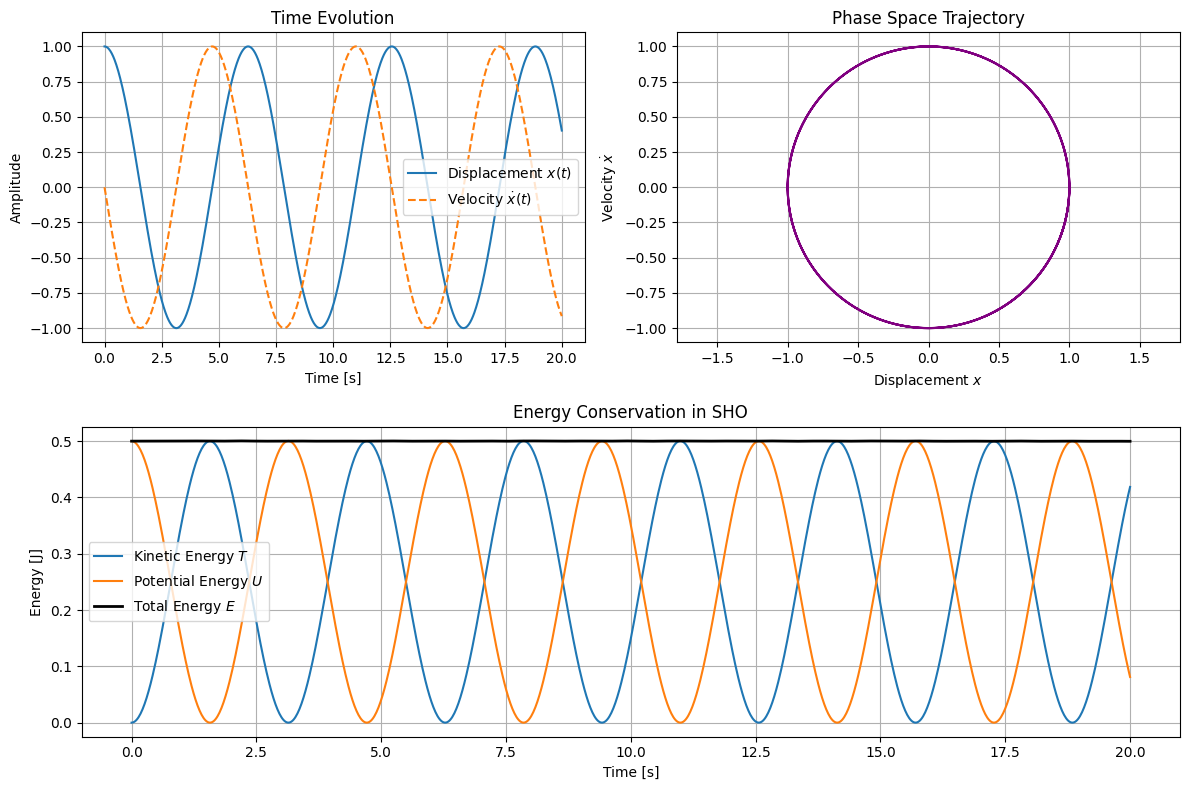

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
m = 1.0        # mass (kg)
k = 1.0        # spring constant (N/m)
omega0 = np.sqrt(k / m)

# Time span
t_start, t_end = 0, 20
t_eval = np.linspace(t_start, t_end, 1000)

# Initial conditions: x0 (displacement), v0 (velocity)
x0 = 1.0
v0 = 0.0

# Define the ODE system: dx/dt = v, dv/dt = -k/m * x
def sho(t, y):
    x, v = y
    dxdt = v
    dvdt = -k / m * x
    return [dxdt, dvdt]

# Solve the ODE
sol = solve_ivp(sho, [t_start, t_end], [x0, v0], t_eval=t_eval)

# Extract solutions
t = sol.t
x = sol.y[0]
v = sol.y[1]

# Energy computations
T = 0.5 * m * v**2
U = 0.5 * k * x**2
E_total = T + U

# Plotting
plt.figure(figsize=(12, 8))

# x(t) and v(t)
plt.subplot(2, 2, 1)
plt.plot(t, x, label='Displacement $x(t)$')
plt.plot(t, v, label='Velocity $\dot{x}(t)$', linestyle='--')
plt.title('Time Evolution')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Phase space: v vs x
plt.subplot(2, 2, 2)
plt.plot(x, v, color='purple')
plt.title('Phase Space Trajectory')
plt.xlabel('Displacement $x$')
plt.ylabel('Velocity $\dot{x}$')
plt.grid(True)
plt.axis('equal')

# Energy over time
plt.subplot(2, 1, 2)
plt.plot(t, T, label='Kinetic Energy $T$')
plt.plot(t, U, label='Potential Energy $U$')
plt.plot(t, E_total, label='Total Energy $E$', linewidth=2, color='black')
plt.title('Energy Conservation in SHO')
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Damped Harmonic Oscillator

The **Damped Harmonic Oscillator (DHO)** extends the simple harmonic oscillator by including a damping force that resists motion. This damping force is typically proportional to velocity and opposes it. Damped oscillations are common in real-world systems where friction, air resistance, or electrical resistance dissipate energy.

## Equation of Motion

Let a mass $m$ be attached to a spring with stiffness $k$, and let a damping force proportional to velocity, with damping coefficient $b$, act on the mass. Applying Newton’s second law yields the governing second-order differential equation:

$$
m \ddot{x} + b \dot{x} + k x = 0
$$

This equation describes how the displacement $x(t)$ evolves in time when both restoring and damping forces act.

## Characteristic Equation and General Solution

To analyze the solution, we assume a trial solution of the form $x(t) = e^{\lambda t}$, leading to the **characteristic equation**:

$$
m \lambda^2 + b \lambda + k = 0
$$

Dividing through by $m$, we write:

$$
\lambda^2 + 2\zeta \omega_0 \lambda + \omega_0^2 = 0
$$

where:

* $\omega_0 = \sqrt{\frac{k}{m}}$ is the **undamped natural frequency**
* $\zeta = \frac{b}{2\sqrt{km}}$ is the **damping ratio**

Solving this quadratic yields:

$$
\lambda = -\zeta \omega_0 \pm \omega_0 \sqrt{\zeta^2 - 1}
$$

The nature of the solution depends on the value of $\zeta$, or equivalently, the discriminant $\zeta^2 - 1$:

## Damping Cases

### 1. Underdamped ($\zeta < 1$):

In this case, the roots are complex conjugates:

$$
\lambda = -\zeta \omega_0 \pm i \omega_d, \quad \text{where } \omega_d = \omega_0 \sqrt{1 - \zeta^2}
$$

The solution takes the form:

$$
x(t) = e^{-\zeta \omega_0 t} \left( A \cos(\omega_d t) + B \sin(\omega_d t) \right)
$$

This represents oscillatory motion with an exponentially decaying envelope. The system oscillates while gradually losing energy.

### 2. Critically Damped ($\zeta = 1$):

Here, the roots are real and equal:

$$
\lambda = -\omega_0
$$

The solution is:

$$
x(t) = (A + B t) e^{-\omega_0 t}
$$

This is the fastest non-oscillatory return to equilibrium. It arises in systems that need rapid damping, such as automotive shock absorbers or needle galvanometers.

### 3. Overdamped ($\zeta > 1$):

The roots are distinct and real:

$$
\lambda = -\zeta \omega_0 \pm \omega_0 \sqrt{\zeta^2 - 1}
$$

The solution is a sum of decaying exponentials:

$$
x(t) = A e^{\lambda_1 t} + B e^{\lambda_2 t}
$$

with $\lambda_1, \lambda_2 < 0$. The system returns to equilibrium without oscillating but more slowly than in the critically damped case.

## Role of the Damping Coefficient

The **damping coefficient** $b$ controls the system's rate of energy dissipation. It directly affects the damping ratio $\zeta$, which determines the qualitative behavior of the system:

* $b = 0$: undamped, pure oscillations
* $0 < b < 2\sqrt{km}$: underdamped
* $b = 2\sqrt{km}$: critically damped
* $b > 2\sqrt{km}$: overdamped

In physical systems, choosing the right damping is a trade-off between responsiveness and suppression of oscillations.

## Phase Portraits

Phase portraits depict system trajectories in the $(x, \dot{x})$ phase space.

* **Underdamped systems** spiral inward toward the origin.
* **Critically damped systems** slide directly inward without spiraling.
* **Overdamped systems** decay monotonically and converge slowly.

These portraits give insight into system dynamics beyond time-domain plots and are useful for understanding stability and transient behavior.


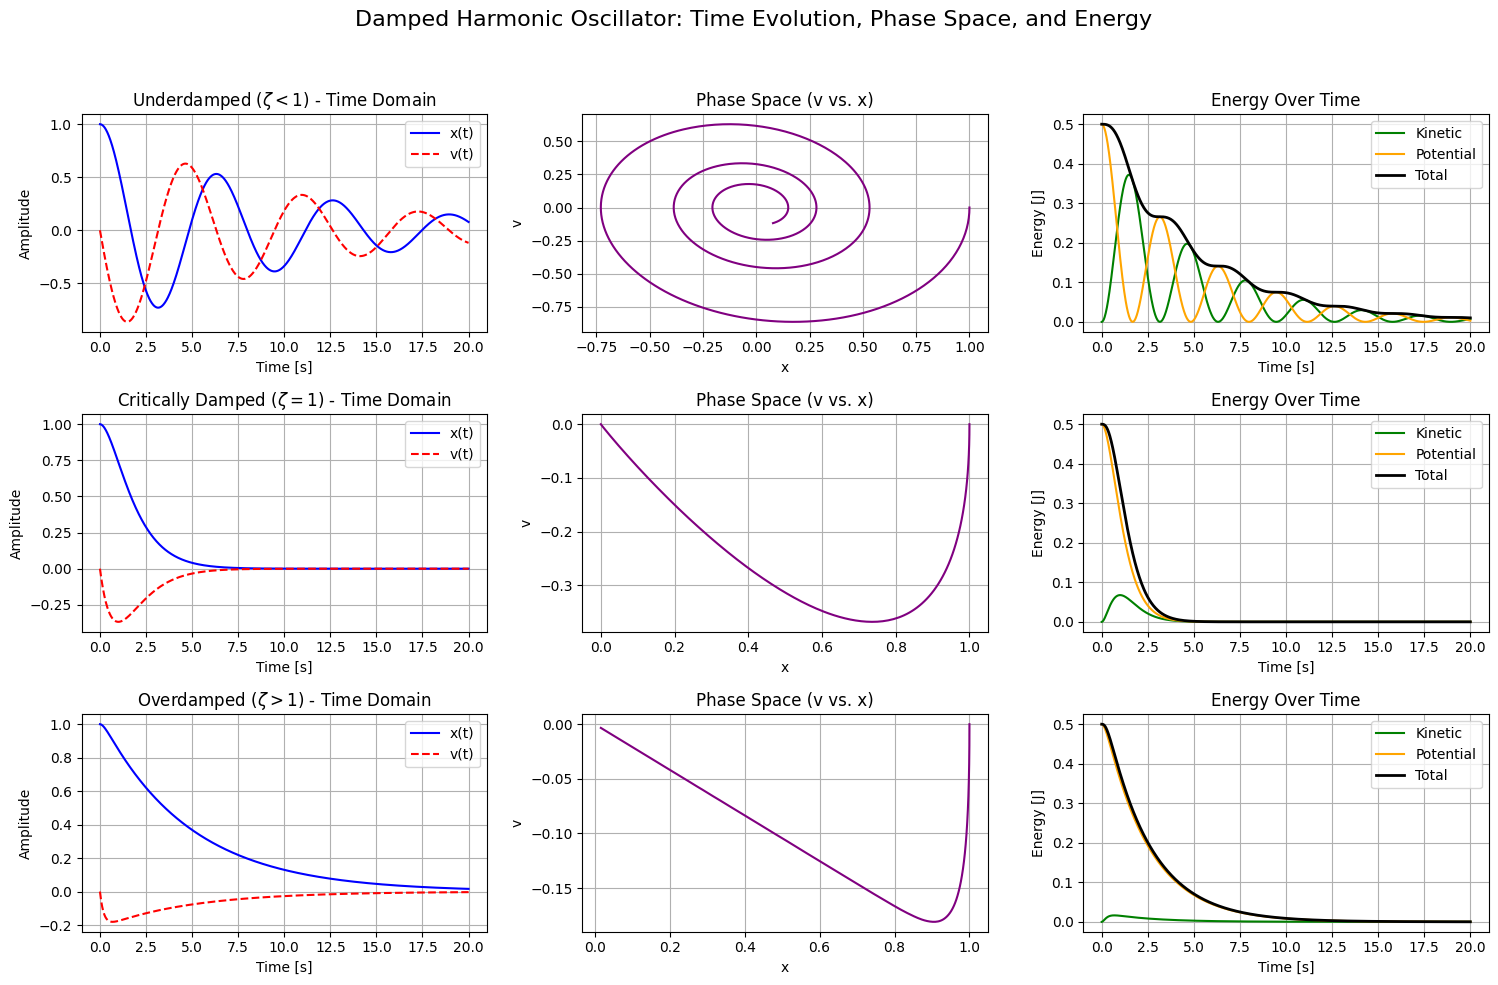

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System parameters
m = 1.0       # Mass (kg)
k = 1.0       # Spring constant (N/m)
omega0 = np.sqrt(k / m)  # Undamped natural frequency

# Damping coefficients for 3 cases
cases = {
    "Underdamped ($\\zeta < 1$)": 0.2,
    "Critically Damped ($\\zeta = 1$)": 2.0,
    "Overdamped ($\\zeta > 1$)": 5.0
}

# Initial conditions
x0 = 1.0   # Initial displacement
v0 = 0.0   # Initial velocity

# Time array
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

fig, axs = plt.subplots(len(cases), 3, figsize=(15, 10))
fig.suptitle("Damped Harmonic Oscillator: Time Evolution, Phase Space, and Energy", fontsize=16)

for i, (label, b) in enumerate(cases.items()):
    # ODE system
    def damped_oscillator(t, y):
        x, v = y
        dxdt = v
        dvdt = -(b / m) * v - (k / m) * x
        return [dxdt, dvdt]

    sol = solve_ivp(damped_oscillator, t_span, [x0, v0], t_eval=t_eval)
    t = sol.t
    x = sol.y[0]
    v = sol.y[1]

    # Energy
    KE = 0.5 * m * v**2
    PE = 0.5 * k * x**2
    E_total = KE + PE

    # Plot displacement and velocity
    axs[i, 0].plot(t, x, label='x(t)', color='blue')
    axs[i, 0].plot(t, v, label='v(t)', color='red', linestyle='--')
    axs[i, 0].set_title(f"{label} - Time Domain")
    axs[i, 0].set_xlabel("Time [s]")
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Phase space
    axs[i, 1].plot(x, v, color='purple')
    axs[i, 1].set_title("Phase Space (v vs. x)")
    axs[i, 1].set_xlabel("x")
    axs[i, 1].set_ylabel("v")
    axs[i, 1].grid(True)

    # Energy
    axs[i, 2].plot(t, KE, label='Kinetic', color='green')
    axs[i, 2].plot(t, PE, label='Potential', color='orange')
    axs[i, 2].plot(t, E_total, label='Total', color='black', linewidth=2)
    axs[i, 2].set_title("Energy Over Time")
    axs[i, 2].set_xlabel("Time [s]")
    axs[i, 2].set_ylabel("Energy [J]")
    axs[i, 2].legend()
    axs[i, 2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Driven Harmonic Oscillator

The **driven harmonic oscillator** models the motion of a mass attached to a spring and damper, subjected to an external periodic driving force. This system is described by the nonhomogeneous second-order linear differential equation:

$$
m\ddot{x} + b\dot{x} + kx = F_0 \cos(\omega t)
$$

where:

* $m$ is the mass,
* $b$ is the damping coefficient,
* $k$ is the spring constant,
* $F_0$ is the amplitude of the driving force, and
* $\omega$ is the driving frequency.

This equation represents a system with internal restoring and damping forces responding to a time-dependent external input. The complete solution consists of two parts: the **transient solution** and the **steady-state solution**.

## Transient and Steady-State Behavior

The **transient solution** arises from the homogeneous part of the equation:

$$
m\ddot{x} + b\dot{x} + kx = 0
$$

This part reflects the system's natural response and typically decays over time due to damping (when $b > 0$). It depends on the initial conditions and exhibits either oscillatory decay (underdamped), exponential decay (overdamped), or critically damped behavior.

The **steady-state solution** arises from the particular solution to the nonhomogeneous equation and describes the long-term behavior under the influence of the driving force. After the transient has died out, the system oscillates at the driving frequency $\omega$, not the natural frequency $\omega_0 = \sqrt{k/m}$, and the solution takes the form:

$$
x_{\text{ss}}(t) = A(\omega) \cos(\omega t - \delta)
$$

where $A(\omega)$ is the amplitude and $\delta$ is the phase shift between the driving force and the system's response. The amplitude depends on the driving frequency, and is given by:

$$
A(\omega) = \frac{F_0/m}{\sqrt{(\omega_0^2 - \omega^2)^2 + (2\zeta \omega \omega_0)^2}}
$$

where:

* $\zeta = \frac{b}{2\sqrt{mk}}$ is the damping ratio,
* $\omega_0 = \sqrt{k/m}$ is the undamped natural frequency.

## Resonance and Quality Factor

**Resonance** occurs when the driving frequency $\omega$ is close to the system’s natural frequency $\omega_0$. In the absence of damping ($b = 0$), the amplitude grows without bound as $\omega \to \omega_0$, indicating **pure resonance**. However, in real systems with nonzero damping, the maximum amplitude occurs at a slightly lower frequency:

$$
\omega_{\text{res}} = \omega_0 \sqrt{1 - 2\zeta^2}
$$

for small damping ($\zeta \ll 1$), this is approximately equal to $\omega_0$.

The **quality factor** $Q$ characterizes how underdamped the system is and how sharply peaked the resonance is. It is defined as:

$$
Q = \frac{\omega_0}{2\zeta\omega_0} = \frac{\sqrt{mk}}{b}
$$

A high $Q$ implies weak damping and a sharp resonance peak; a low $Q$ corresponds to strong damping and a broad, shallow resonance.

## Amplitude-Frequency Response

The function $A(\omega)$, describing how the amplitude of oscillation depends on the driving frequency, is known as the **amplitude-frequency response**. This curve shows a pronounced peak near the resonant frequency and decreases both below and above it. Plotting $A(\omega)$ versus $\omega$ reveals the bandwidth and sharpness of resonance, which are directly related to the quality factor $Q$. This response is central to understanding real-world systems such as filters, oscillators, and mechanical resonators.


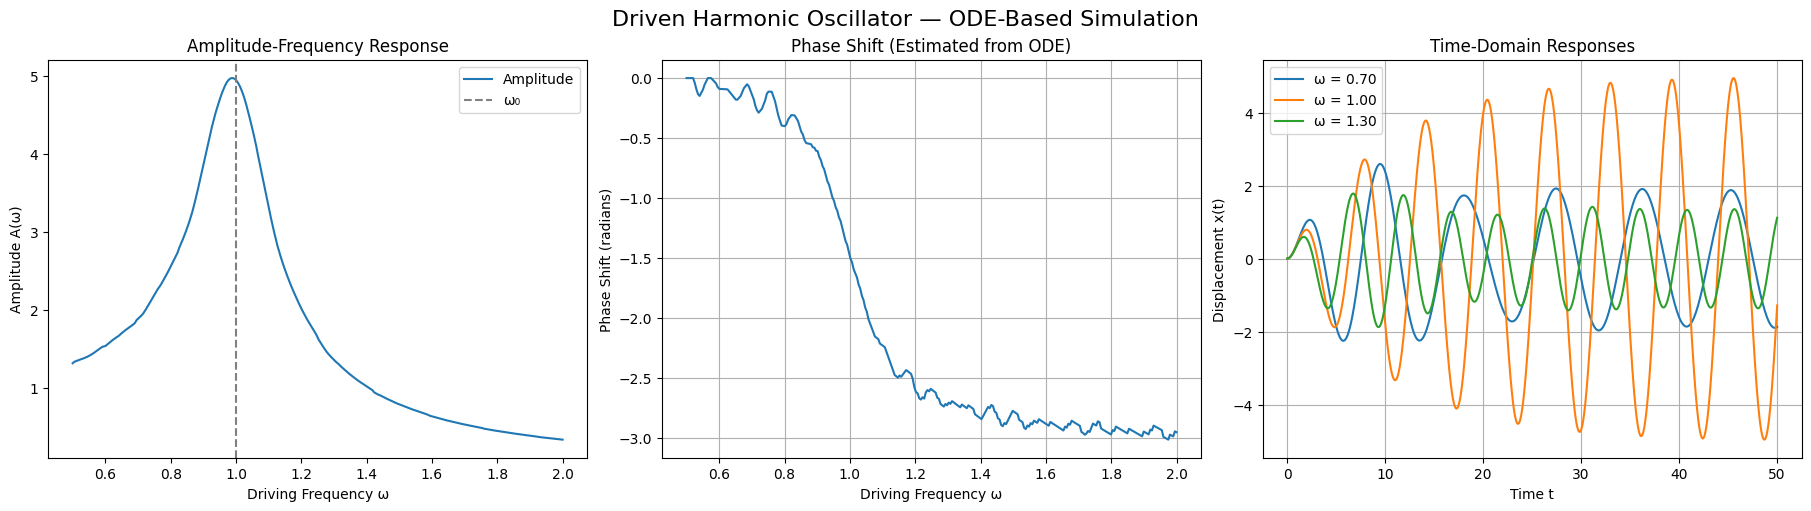

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System Parameters
m = 1.0   # mass
k = 1.0   # spring constant
b = 0.2   # damping coefficient
F0 = 1.0  # driving force amplitude

# Derived values
omega0 = np.sqrt(k / m)
zeta = b / (2 * np.sqrt(m * k))
omega_vals = np.linspace(0.5, 2.0, 300)

# Time settings for ODE
t_max = 50
t_eval = np.linspace(0, t_max, 2000)

# Function to solve the driven harmonic oscillator ODE
def solve_driven_oscillator(omega_drive, x0=0.0, v0=0.0):
    def ode(t, y):
        x, v = y
        dxdt = v
        dvdt = (F0 * np.cos(omega_drive * t) - b * v - k * x) / m
        return [dxdt, dvdt]
    sol = solve_ivp(ode, [0, t_max], [x0, v0], t_eval=t_eval)
    return sol.t, sol.y[0]

# 1. Amplitude sweep using ODEs
amplitudes = []
phases = []

for omega in omega_vals:
    t, x = solve_driven_oscillator(omega)
    x_steady = x[-500:]  # Use last part to estimate steady-state
    amp = (np.max(x_steady) - np.min(x_steady)) / 2
    amplitudes.append(amp)

    # Estimate phase shift (optional, simple way)
    t_cos = t[-500:]
    cos_wave = F0 * np.cos(omega * t_cos)
    cross_corr = np.correlate(x_steady - np.mean(x_steady), cos_wave - np.mean(cos_wave), mode='full')
    delay_index = cross_corr.argmax() - (len(x_steady) - 1)
    phase = -omega * (delay_index * (t[1] - t[0]))
    phases.append(phase)

# 2. Time-domain responses for selected driving frequencies
omega_test = [0.7, omega0, 1.3]
responses = [solve_driven_oscillator(w) for w in omega_test]

# Plotting: 3 plots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Amplitude-Frequency Response
axs[0].plot(omega_vals, amplitudes, label="Amplitude")
axs[0].axvline(omega0, color='gray', linestyle='--', label='ω₀')
axs[0].set_title('Amplitude-Frequency Response')
axs[0].set_xlabel('Driving Frequency ω')
axs[0].set_ylabel('Amplitude A(ω)')
axs[0].legend()

# Phase Shift
axs[1].plot(omega_vals, np.unwrap(phases), label="Phase shift")
axs[1].set_title('Phase Shift (Estimated from ODE)')
axs[1].set_xlabel('Driving Frequency ω')
axs[1].set_ylabel('Phase Shift (radians)')
axs[1].grid(True)

# Time-Domain Responses
for i, (t, x) in enumerate(responses):
    axs[2].plot(t, x, label=f'ω = {omega_test[i]:.2f}')
axs[2].set_title('Time-Domain Responses')
axs[2].set_xlabel('Time t')
axs[2].set_ylabel('Displacement x(t)')
axs[2].legend()
axs[2].grid(True)

plt.suptitle("Driven Harmonic Oscillator — ODE-Based Simulation", fontsize=16)
plt.show()



# Damping Regimes in the Driven Harmonic Oscillator

The response of a driven harmonic oscillator is governed by the nonhomogeneous linear second-order differential equation:

$$
m\ddot{x} + b\dot{x} + kx = F_0 \cos(\omega t)
$$

where $m$ is the mass, $b$ is the damping coefficient, $k$ is the spring constant, $F_0$ is the amplitude of the driving force, and $\omega$ is the driving frequency. The general solution of this equation comprises two parts:

1. The **transient solution**, which solves the associated homogeneous equation:

   $$
   m\ddot{x} + b\dot{x} + kx = 0
   $$

   and depends on the initial conditions and the damping regime.

2. The **steady-state solution**, which is a particular solution of the nonhomogeneous equation and describes the long-term periodic response of the system to the external driving force.

The **form of the transient solution** depends critically on the **damping ratio** $\zeta$, defined by:

$$
\zeta = \frac{b}{2\sqrt{mk}}
$$

This ratio determines the qualitative nature of the transient behavior, even in the presence of continuous driving.

## Underdamped Case $(\zeta < 1)$

In the **underdamped regime**, damping is weak, and the system exhibits oscillatory decay. The homogeneous (transient) solution is:

$$
x_{\text{trans}}(t) = e^{-\zeta \omega_0 t} \left( A \cos(\omega_d t) + B \sin(\omega_d t) \right)
$$

where $\omega_0 = \sqrt{\frac{k}{m}}$ is the undamped natural frequency, and the **damped natural frequency** is:

$$
\omega_d = \omega_0 \sqrt{1 - \zeta^2}
$$

As time progresses, this decaying oscillatory response is dominated by the **steady-state solution**:

$$
x_{\text{ss}}(t) = A(\omega) \cos(\omega t - \delta)
$$

The resulting motion initially includes both the natural and driving frequencies but asymptotically becomes a pure sinusoid at the driving frequency $\omega$. This is the most **resonant** regime, exhibiting a sharp peak in amplitude near $\omega_0$.

## Critically Damped Case $(\zeta = 1)$

In the **critically damped regime**, the system returns to equilibrium in the **shortest time** without oscillating. The homogeneous solution is:

$$
x_{\text{trans}}(t) = (A + Bt) e^{-\omega_0 t}
$$

There is no sinusoidal component in the transient response. The system smoothly transitions to the steady-state behavior with no overshoot or ringing. Although the system is still driven, the transient response is **non-oscillatory**, and the overall motion settles efficiently into the steady-state oscillation.

## Overdamped Case $(\zeta > 1)$

In the **overdamped regime**, the damping is strong, and the system returns to equilibrium slowly and monotonically. The homogeneous solution is composed of two decaying exponentials with different time constants:

$$
x_{\text{trans}}(t) = A e^{r_1 t} + B e^{r_2 t}
$$

where $r_1$ and $r_2$ are the distinct negative real roots of the characteristic equation. Like the critically damped case, there are no oscillations in the transient phase, but the return to steady-state is slower due to the dominance of the slower exponential term. The steady-state sinusoid emerges gradually, and the system exhibits a broad, flat resonance profile.

### **Summary and Physical Interpretation**

| Regime            | Damping Ratio $\zeta$ | Transient Behavior            | Time to Steady-State | Resonance  |
| ----------------- | --------------------- | ----------------------------- | -------------------- | ---------- |
| Underdamped       | $0 < \zeta < 1$       | Oscillatory decay             | Moderate             | Sharp      |
| Critically Damped | $\zeta = 1$           | Fastest non-oscillatory decay | Fastest              | Broad      |
| Overdamped        | $\zeta > 1$           | Slow monotonic decay          | Longest              | Very broad |

In all cases, the **steady-state response** is determined by the driving frequency $\omega$, not the natural frequency $\omega_0$. However, the **transient response**—which governs how the system reaches this long-term behavior—is governed by the damping regime. Understanding these cases is essential for engineering applications such as vibration isolation, electrical filtering, and signal processing, where transient suppression and resonance control are critical.

---

Let me know if you'd like a similar treatment of the **phase portraits** for each damping case or an interactive visualization.
